<a href="https://colab.research.google.com/github/amo33/study_projects/blob/main/selectiveSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selectivesearch

  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4349 sha256=ca734bcca84dcfe1ff8d56864a62b8b26d4b104f62eed465d0f7ff9a46fb1333
  Stored in directory: /root/.cache/pip/wheels/83/0e/c9/4713ec9c1692e688f84fd3e80201018a02992949ca63697ba8
Successfully built selectivesearch


In [43]:
from PIL import Image

image = Image.open('Hepburn.jpeg')
new_image = image.resize((450,375))
new_image.save('Hepburn.jpeg')


(375, 450, 3)


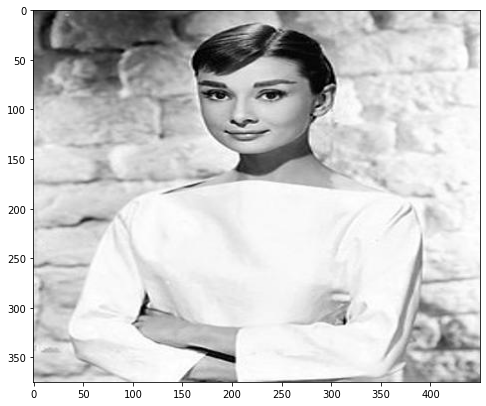

In [44]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt

img_bgr = cv2.imread('Hepburn.jpeg')
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

print(img_rgb.shape)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show()

In [45]:
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=1000) # my guess - use '_' to ignore the first value return  
print(type(regions), len(regions))
print(regions[0])
print(regions[1])

<class 'list'> 71
{'rect': (0, 0, 64, 86), 'size': 2389, 'labels': [0.0]}
{'rect': (17, 0, 144, 50), 'size': 5259, 'labels': [1.0]}


In [46]:
cand_rects = [box['rect'] for box in regions]

In [47]:
cand_rects

[(0, 0, 64, 86),
 (17, 0, 144, 50),
 (139, 0, 123, 39),
 (246, 0, 203, 109),
 (263, 0, 70, 26),
 (337, 0, 112, 59),
 (160, 15, 96, 52),
 (230, 21, 73, 64),
 (87, 30, 78, 67),
 (21, 39, 74, 56),
 (163, 44, 110, 69),
 (0, 63, 135, 74),
 (195, 67, 109, 74),
 (277, 72, 89, 93),
 (166, 74, 59, 77),
 (323, 74, 126, 221),
 (54, 76, 153, 99),
 (118, 82, 56, 48),
 (203, 119, 78, 46),
 (0, 121, 111, 54),
 (202, 146, 103, 31),
 (74, 155, 346, 192),
 (0, 171, 169, 51),
 (352, 189, 79, 50),
 (89, 190, 59, 119),
 (41, 210, 67, 104),
 (0, 212, 79, 46),
 (116, 253, 82, 64),
 (0, 254, 57, 79),
 (390, 272, 59, 67),
 (184, 274, 203, 100),
 (231, 291, 218, 83),
 (35, 294, 78, 47),
 (100, 299, 105, 48),
 (0, 314, 205, 60),
 (0, 330, 65, 39),
 (166, 67, 138, 84),
 (87, 0, 175, 97),
 (0, 63, 174, 74),
 (0, 171, 169, 87),
 (0, 0, 95, 95),
 (163, 44, 141, 107),
 (0, 171, 169, 138),
 (0, 76, 207, 99),
 (87, 0, 217, 151),
 (246, 0, 203, 165),
 (323, 74, 126, 221),
 (0, 63, 207, 112),
 (0, 0, 161, 95),
 (323, 74,

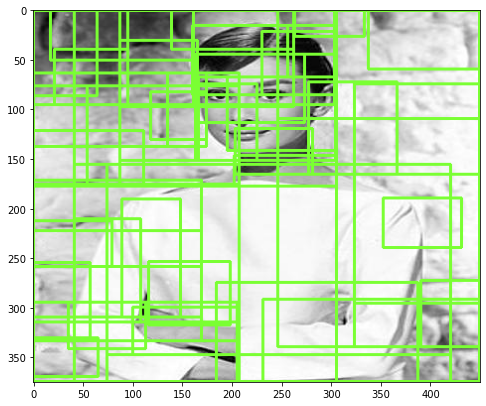

In [48]:
green_rgb = (122, 255, 51)
img_rgb_copy = img_rgb.copy()

for rect in cand_rects:

    left = rect[0]
    top = rect[1]

    right = left + rect[2] # 가장 오른쪽 아래 점을 구하기 위한 x 좌표 
    bottom = top + rect[3] # 가장 오른쪽 아래 점을 구하기 위한 y 좌표 
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    # rectangle 메소드는 해당 image에 직사각형을 그려준다.

# 상자를 추가한 Image로 변수 변경
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy) # we are trying to show img 라는 것을 plt에게 알려준다.
plt.show() # plt는 그린다.


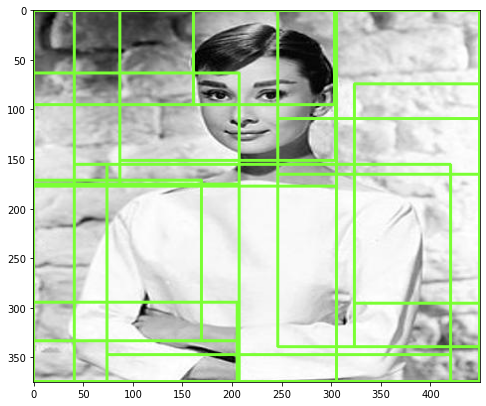

In [50]:
# If I want to make candidate boxes with better speed, I can pick some big boxes and not think of small boxes

cand_selected = [cand['rect'] for cand in regions if cand['size']>10000]
img_copy = img_rgb.copy()
for rect in cand_selected:

    left = rect[0]
    top = rect[1]

    right = left + rect[2] # 가장 오른쪽 아래 점을 구하기 위한 x 좌표 
    bottom = top + rect[3] # 가장 오른쪽 아래 점을 구하기 위한 y 좌표 
    img_copy = cv2.rectangle(img_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    # rectangle 메소드는 해당 image에 직사각형을 그려준다.

# 상자를 추가한 Image로 변수 변경
plt.figure(figsize=(8, 8))
plt.imshow(img_copy) # we are trying to show img 라는 것을 plt에게 알려준다.
plt.show() # plt는 그린다.

In [51]:
cand_selected

[(246, 0, 203, 109),
 (323, 74, 126, 221),
 (74, 155, 346, 192),
 (87, 0, 217, 151),
 (246, 0, 203, 165),
 (323, 74, 126, 221),
 (0, 63, 207, 112),
 (0, 0, 161, 95),
 (323, 74, 126, 265),
 (246, 0, 203, 165),
 (0, 171, 169, 162),
 (0, 63, 207, 270),
 (74, 155, 346, 219),
 (87, 0, 218, 177),
 (41, 155, 379, 219),
 (0, 0, 303, 95),
 (246, 0, 203, 165),
 (0, 294, 205, 80),
 (0, 63, 207, 311),
 (246, 0, 203, 339),
 (0, 63, 207, 311),
 (0, 0, 305, 177),
 (0, 0, 305, 177),
 (0, 0, 305, 374),
 (41, 0, 408, 374),
 (0, 0, 449, 374),
 (0, 0, 449, 374)]

In [52]:
import numpy as np

# input에는 (x1 y1 x2 x2) 이미지의 좌상단, 우하단 좌표가 들어가 있다.
def compute_iou(cand_box, gt_box):

    # Calculate intersection areas
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[2], gt_box[2])
    y2 = np.minimum(cand_box[3], gt_box[3])

    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0) # 혹시 모르게 음수가 나올 수 있으니까..

    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection

    iou = intersection / union
    return iou

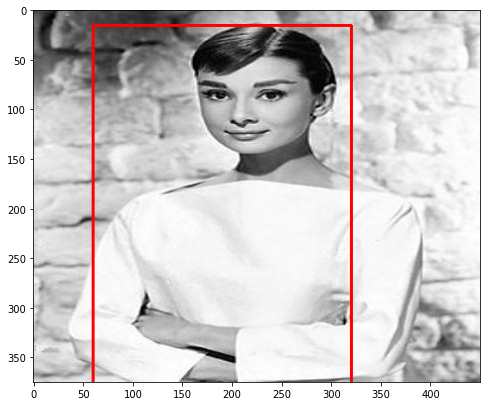

In [53]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 실제 box(Ground Truth)의 좌표를 아래와 같다고 가정.
gt_box = [60, 15, 320, 420]

img = cv2.imread('Hepburn.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0 , 0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [54]:
import selectivesearch

#selectivesearch.selective_search()는 이미지의 Region Proposal정보를 반환
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 47


In [55]:
_, regions = selectivesearch.selective_search(img_rgb, scale = 100, min_size = 2000)

print(type(regions), len(regions))

<class 'list'> 47


In [56]:
cand_rects = [cand['rect'] for cand in regions if cand['size']>15000]

for index, cand_box in enumerate(cand_rects):
  cand_box = list(cand_box)
  cand_box[2] += cand_box[0]
  cand_box[3] += cand_box[1]

  iou = compute_iou(cand_box, gt_box)
  print('index {0}, iou : {1}'.format(index, iou))

index 0, iou : 0.5811965811965812
index 1, iou : 0.0
index 2, iou : 0.39559354226020893
index 3, iou : 0.0
index 4, iou : 0.30792529025744575
index 5, iou : 0.5811965811965812
index 6, iou : 0.0
index 7, iou : 0.30792529025744575
index 8, iou : 0.1671415004748338
index 9, iou : 0.3230434053963466
index 10, iou : 0.16747580702814768
index 11, iou : 0.2085915711186861
index 12, iou : 0.5883899984753773
index 13, iou : 0.6666362252663622
index 14, iou : 0.5914332784184514
index 15, iou : 0.5914332784184514
index 16, iou : 0.5188841822042849
index 17, iou : 0.5188841822042849


img shape: (375, 450, 3)
index : 9, iou : 0.5811965811965812, rectangle: [62, 134, 317, 374]
index : 25, iou : 0.5811965811965812, rectangle: [62, 134, 317, 374]
index : 32, iou : 0.5883899984753773, rectangle: [62, 0, 449, 374]
index : 33, iou : 0.6666362252663622, rectangle: [0, 0, 304, 374]
index : 34, iou : 0.5914332784184514, rectangle: [59, 0, 449, 374]
index : 35, iou : 0.5914332784184514, rectangle: [59, 0, 449, 374]
index : 36, iou : 0.5188841822042849, rectangle: [0, 0, 449, 374]
index : 37, iou : 0.5188841822042849, rectangle: [0, 0, 449, 374]


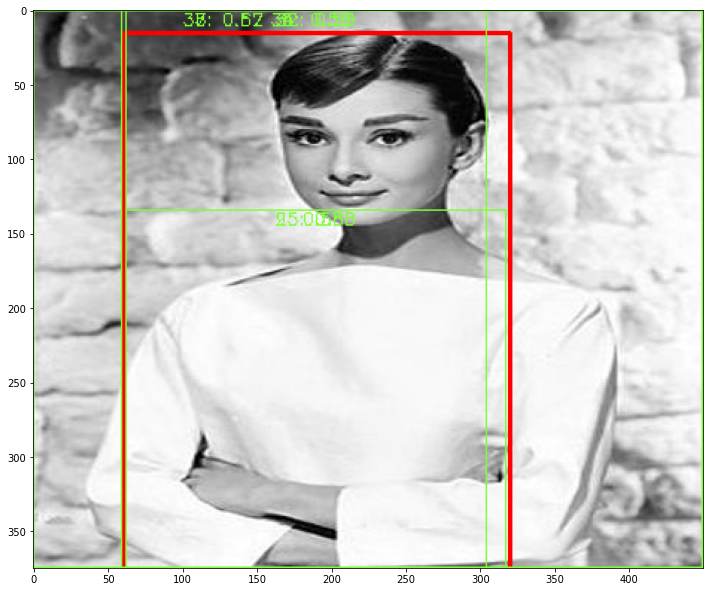

In [59]:
img = cv2.imread('Hepburn.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

green_rgb = (125, 255, 51)
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 3000]
gt_box = [60, 15, 320, 420]
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

for index, cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]

    iou = compute_iou(cand_box, gt_box)

    if iou > 0.5:
        print("index : {0}, iou : {1}, rectangle: {2}".format(index, iou, (cand_box)))
        cv2.rectangle(img_rgb, (cand_box[0],cand_box[1]), (cand_box[2],cand_box[3]) , color = green_rgb,  thickness =1)
        text = "{}: {:.2f}".format(index, iou)
        cv2.putText(img_rgb, text, (cand_box[0]+ 100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_rgb, thickness=1)

plt.figure(figsize=(12,12)) # 보여줄 figure를 만든다.
plt.imshow(img_rgb) # img_rgb를 보여준다고 지정한다.
plt.show() # 보여준다.